<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94%D0%97_13_Lite_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

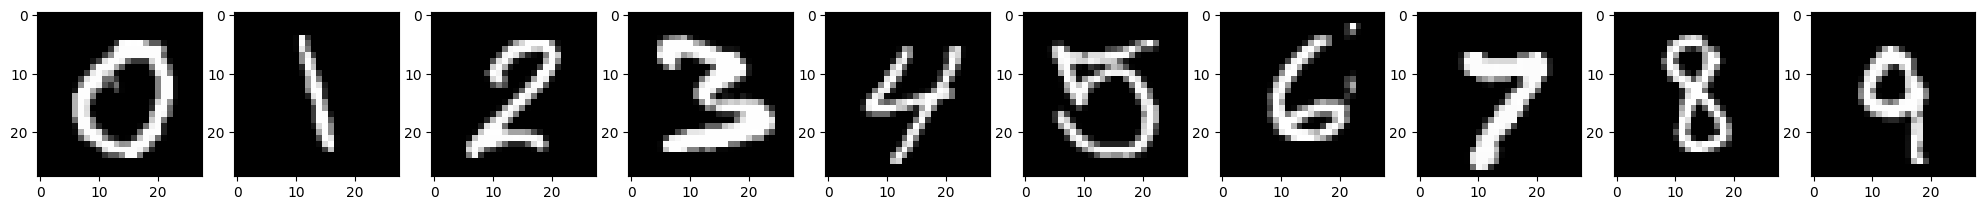

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [ ]:
# Ваше решение

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [ ]:
# import matplotlib for visualization
import matplotlib.pyplot as plt


In [ ]:
# tuning parameters
batch_size = 128
num_classes = 10
epochs = 15


Далее мы преобразуем наш набор данных из изображений, структурированных как 28 на 28 пикселей, в вектор, который имеет входные значения 784 пикселя.
Сначала мы введем размеры нашего изображения.



In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

А затем мы изменяем наши данные.

Мы также нормализуем значения пикселей из оттенков серого (от 0 до 255) в диапазон от 0 до 1. Мы делаем это, разделив каждое из них на 255:


In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')


x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


Определение нашей нейронной сети

Теперь мы определим нашу модель нейронной сети, которая, как уже упоминалось, будет использовать TensorFlow в качестве бэкэнда модели.
Структура нашей архитектуры сверточной нейронной сети определена ниже:

Первый скрытый слойConv2D— это сверточный слой, который имеет 32 карты объектов, каждая размером 3 x 3, и мы используем adam 0.001 как функцию активации .
Затем мы добавляем еще один сверточный слой с 64 картами объектов.
Мы добавляем третий сверточный слой со 128 картами признаков.
Затем мы добавляем слой объединенияMaxPooling2D1который настроен с размером пула 2 x 2

Затем мы применяем слой регуляризации, используяDropoutнастроено на случайное исключение 25% нейронов в слое – это используется для уменьшения переобучения
Затем мы преобразуем двумерную матрицу в вектор, используяFlatten– это позволяет обрабатывать наши выходные данные полностью связанными слоями.
Далее мы добавляем полносвязный слой со 128 нейронами и функцией активации  
adam 0.001.

Затем мы добавим еще один слой регуляризации, чтобы уменьшить переобучение, на этот раз мы случайным образом исключаем 50% нейронов.
Мы завершаем нейронную сеть выходным слоем, имеющим 10 нейронов — столько же, сколько классов в нашей задаче классификации и функции активации softmax. Это выведет прогноз вероятности того, что цифра принадлежит каждому классу.


In [ ]:
# import TensorFlow backend
import tensorflow as tf

# define our model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))



In [ ]:
#Скомпилируем модель с помощью .Adam
import keras
from keras import layers

model.compile(loss=keras.losses.categorical_crossentropy,
		optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


Обучение модели
Теперь мы подгоним модель, используя размер пакета 128 и 15 эпох.


In [ ]:
store_learning = model.fit(x_train,  # ----------------- x_train, примеры набора данных
                           y_train,  # ----------------- y_train, метки примеров набора данных
                           validation_split=0.2,  # --- 0.2 - доля данных для валидационной (проверочной) выборки, 1-0.2=0.8 останется в обучающей
                           shuffle=True,  # ----------- перемешивание данных для равномерного обучения, соответствие экземпляра и метки сохраняется
                           batch_size=batch_size,  # ---------- размер пакета, который обрабатывает нейронка перед одним изменением весов
                           epochs=epochs,  # -------------- epochs - количество эпох обучения
                           verbose=1)  # -------------- 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
375/375 [==============================] - 13s 18ms/step - loss: 0.2226 - accuracy: 0.9319 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 2/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0804 - accuracy: 0.9763 - val_loss: 0.0392 - val_accuracy: 0.9886
Epoch 3/15
375/375 [==============================] - 6s 17ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0403 - val_accuracy: 0.9885
Epoch 4/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.0333 - val_accuracy: 0.9921
Epoch 5/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.0363 - val_accuracy: 0.9901
Epoch 6/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0315 - val_accuracy: 0.9914
Epoch 7/15
375/375 [==============================] - 6s 17ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0304 - val_accuracy: 0.991

В переменную store_learning как результат метода обучения модели .fit() записалась история обучения, значения тех самых loss и accuracy на каждой эпохе обучения. Причем как для обучающей выборки, так и для проверочной.

Вы видели эти значения в распечатке по ходу обучения модели. По окончании обучения они записались в словарь store_learning.history.

Чтобы обратиться к этим данным в переменной store_learning, используем loss, val_loss, accuracy и val_accuracy в качестве ключей словаря. Далее с помощью методов из модуля matplotlib.pyplot покажем их в виде графиков.

Смотрите:

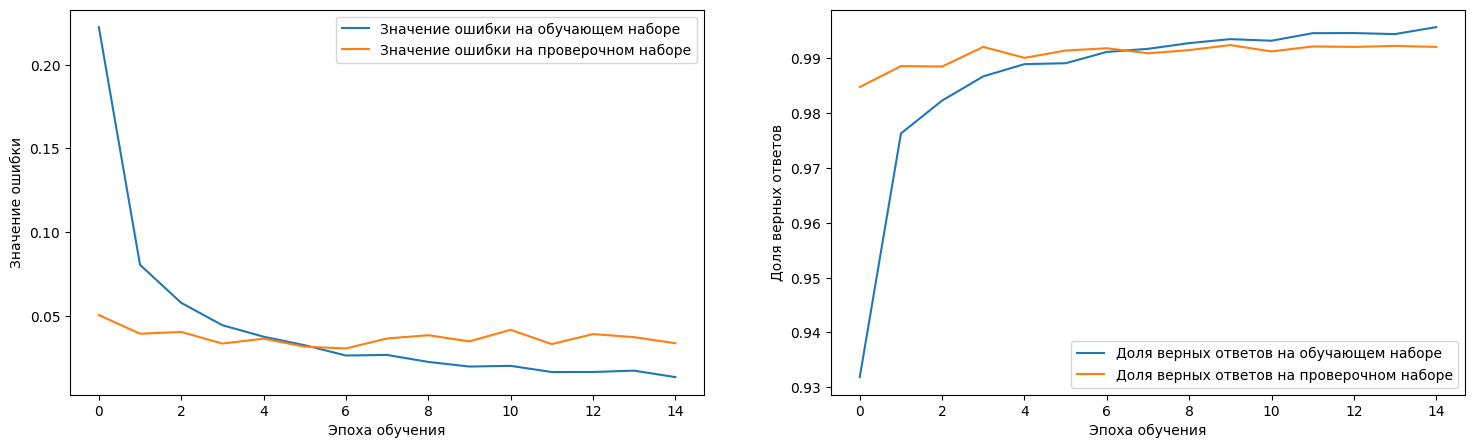

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()